In [1]:
import torch, torchvision
import numpy as np
import matplotlib.pyplot as plt
import os ,cv2, glob, copy, random, time
import torchvision
import torchvision.transforms as transforms
import PIL.Image as Image

%matplotlib inline

from torch.utils.data import Dataset
from torch.utils.data import DataLoader

In [2]:
classes = ['Durian', 'Pumpkin', 'Tomato', 'Watermelon']

path = ['C:/Users/User/Deep Learning Workshop/data/classification/fruit_dataset/test/test1.jpg',
       'C:/Users/User/Deep Learning Workshop/data/classification/fruit_dataset/test/test2.jpg',
       'C:/Users/User/Deep Learning Workshop/data/classification/fruit_dataset/test/test3.jpg',
       'C:/Users/User/Deep Learning Workshop/data/classification/fruit_dataset/test/test4.jpg']
# path0 = 'C:/Users/User/Deep Learning Workshop/data/fruit_dataset/test/test1.jpg'
# path1 = 'C:/Users/User/Deep Learning Workshop/data/fruit_dataset/test/test2.jpg'
# path2 = 'C:/Users/User/Deep Learning Workshop/data/fruit_dataset/test/test3.jpg'
# path3 = 'C:/Users/User/Deep Learning Workshop/data/fruit_dataset/test/test4.jpg'

mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

test_transforms = transforms.Compose([
        transforms.Resize(256),
        transforms.ToTensor(),
        transforms.Normalize(mean, std)
    ])

In [3]:
the_model = torch.load('GoogleNet_Fruit_Classification_.pt')
the_model = the_model.eval()

In [4]:
def classify(model, test_transforms, img_path, classes):
    
    image = Image.open(img_path)
    img = image.copy()
    image = test_transforms(image).float()
    image = image.unsqueeze(0)
    
    output = the_model(image)
    _, predicted = torch.max(output.data, 1)
    
    plt.imshow(img)
    plt.title(classes[predicted.item()])
    plt.axis("off")
    plt.show()

C:\Users\User\anaconda3\lib\site-packages\torch\nn\functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"


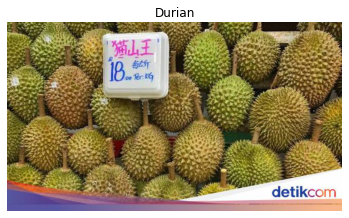

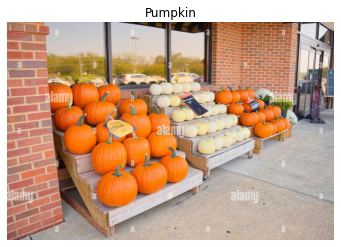

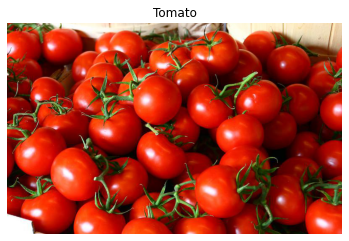

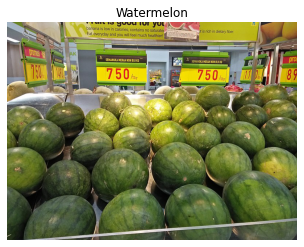

In [5]:
for i in range(4):
    classify(the_model, test_transforms, path[i], classes)